# E-Commerce Shipping Data

<img src='Shipping.jpg' width="400" height="400">

(Meta data)
- `ID:` ID Number of Customers.
- `Warehouse block:` The Company have big Warehouse which is divided in to block such as A,B,C,D,E.
- `Mode of shipment:` The Company Ships the products in multiple way such as Ship, Flight and Road.
- `Customer care calls:` The number of calls made from enquiry for enquiry of the shipment.
- `Customer rating:` The company has rated from every customer. 1 is the lowest (Worst), 5 is the highest (Best).
- `Cost of the product:` Cost of the Product in US Dollars.
- `Prior purchases:` The Number of Prior Purchase.
- `Product importance:` The company has categorized the product in the various parameter such as low, medium, high.
- `Gender:` Male and Female.
- `Discount offered:` Discount offered on that specific product.
- `Weight in gms:` It is the weight in grams.
- `Reached on time:` It is the target variable, where 1 Indicates that the product has NOT reached on time and 0 indicates it has reached on time.

__[You can get data by clicking here](https://www.kaggle.com/datasets/prachi13/customer-analytics?resource=download)__

`This Project will answer the following questions:`
- What was Customer Rating? And was the product delivered on time?
- Is Customer query is being answered?
- If Product importance is high. having higest rating or being delivered on time?

`_____________________________________________________________________________________________________`

### Importing Python Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

### Importing data

In [2]:
data = pd.read_csv('shipping.csv')
data.head(3)

,ID,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
0,1,D,Flight,4,2,177,3,low,F,44,1233,1
1,2,F,Flight,4,5,216,2,low,M,59,3088,1
2,3,A,Flight,2,2,183,4,low,M,48,3374,1


### Exploring data

In [3]:
data.shape

(10999, 12)

In [4]:
data.columns

Index(['ID', 'Warehouse_block', 'Mode_of_Shipment', 'Customer_care_calls',
       'Customer_rating', 'Cost_of_the_Product', 'Prior_purchases',
       'Product_importance', 'Gender', 'Discount_offered', 'Weight_in_gms',
       'Reached.on.Time_Y.N'],
      dtype='object')

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10999 entries, 0 to 10998
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   ID                   10999 non-null  int64 
 1   Warehouse_block      10999 non-null  object
 2   Mode_of_Shipment     10999 non-null  object
 3   Customer_care_calls  10999 non-null  int64 
 4   Customer_rating      10999 non-null  int64 
 5   Cost_of_the_Product  10999 non-null  int64 
 6   Prior_purchases      10999 non-null  int64 
 7   Product_importance   10999 non-null  object
 8   Gender               10999 non-null  object
 9   Discount_offered     10999 non-null  int64 
 10  Weight_in_gms        10999 non-null  int64 
 11  Reached.on.Time_Y.N  10999 non-null  int64 
dtypes: int64(8), object(4)
memory usage: 1.0+ MB


### Data cleaning

In [6]:
# Check for Nulls
data.isnull().sum()

ID                     0
Warehouse_block        0
Mode_of_Shipment       0
Customer_care_calls    0
Customer_rating        0
Cost_of_the_Product    0
Prior_purchases        0
Product_importance     0
Gender                 0
Discount_offered       0
Weight_in_gms          0
Reached.on.Time_Y.N    0
dtype: int64

In [7]:
# Check for duplicates
data.duplicated().sum()

0

In [8]:
# Replace 'F'&'M'  in "Gender" Column with "Female" & "Male"
data['Gender'].replace(['F','M'],['Female','Male'],inplace=True)

In [9]:
# Renaming the "Reached.on.Time_Y.N" Column
data.rename(columns={'Reached.on.Time_Y.N':'Reached_on_Time'} , inplace=True)

### EDA

In [10]:
data.describe()

,ID,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Discount_offered,Weight_in_gms,Reached_on_Time
count,10999.00000,10999.000000,10999.000000,10999.000000,10999.000000,10999.000000,10999.000000,10999.000000
mean,5500.00000,4.054459,2.990545,210.196836,3.567597,13.373216,3634.016729,0.596691
std,3175.28214,1.141490,1.413603,48.063272,1.522860,16.205527,1635.377251,0.490584
min,1.00000,2.000000,1.000000,96.000000,2.000000,1.000000,1001.000000,0.000000
25%,2750.50000,3.000000,2.000000,169.000000,3.000000,4.000000,1839.500000,0.000000
50%,5500.00000,4.000000,3.000000,214.000000,3.000000,7.000000,4149.000000,1.000000
75%,8249.50000,5.000000,4.000000,251.000000,4.000000,10.000000,5050.000000,1.000000
max,10999.00000,7.000000,5.000000,310.000000,10.000000,65.000000,7846.000000,1.000000


``---------------------------------------Warehouse Block---------------------------------------------``

,Total,Percentage
F,3666,33.33
D,1834,16.67
A,1833,16.67
B,1833,16.67
C,1833,16.67


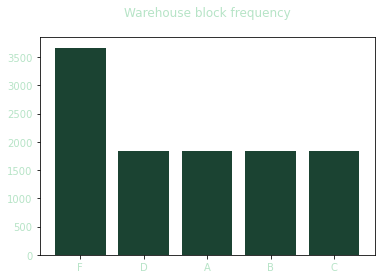

In [11]:
total = data['Warehouse_block'].value_counts()
percentage = round((total/len(data))*100,2)
warehouse_freq = pd.concat([total,percentage] ,axis=1, keys=['Total','Percentage'] )

plt.bar(data['Warehouse_block'].value_counts().index , data['Warehouse_block'].value_counts() , color='#1b4332')
plt.xticks(color='#b7e4c7')
plt.yticks(color='#b7e4c7')
plt.title("Warehouse block frequency\n" , color='#b7e4c7')
plt.show;
warehouse_freq

C:\Users\pinkp\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


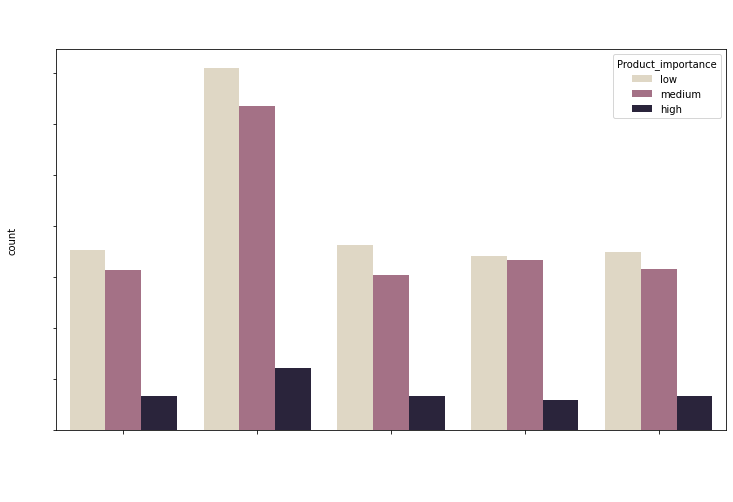

In [12]:
plt.figure(figsize=(12,7))
sns.countplot('Warehouse_block',hue='Product_importance',data=data,palette='ch:s=-0.2,r=0.6')
plt.xticks(color='white',fontsize=15)
plt.yticks(color='white',fontsize=11)
plt.xlabel("\nWarehouse block",fontsize=18,color='white')
plt.title("Product importance of each Warehouse block \n",fontsize=20,color='white')
plt.show();

In [13]:
pd.pivot_table(data,index=['Warehouse_block'],values=['Reached_on_Time'],aggfunc='sum').sort_values(by=['Reached_on_Time'],ascending=False)

,Reached_on_Time
Warehouse_block,
F,2194
B,1104
D,1096
C,1094
A,1075


In [14]:
percentage_of_delay_in_WH_A = data[(data['Warehouse_block']=='A')&(data['Reached_on_Time']==0)].count()/data[data['Warehouse_block']=='A'].count()
print("Percentage of delay in Warehouse A is "+str(round(percentage_of_delay_in_WH_A['Reached_on_Time']*100,2))+" %")
percentage_of_delay_in_WH_B = data[(data['Warehouse_block']=='B')&(data['Reached_on_Time']==0)].count()/data[data['Warehouse_block']=='B'].count()
print("Percentage of delay in Warehouse B is "+str(round(percentage_of_delay_in_WH_B['Reached_on_Time']*100,2))+" %")
percentage_of_delay_in_WH_C = data[(data['Warehouse_block']=='C')&(data['Reached_on_Time']==0)].count()/data[data['Warehouse_block']=='C'].count()
print("Percentage of delay in Warehouse C is "+str(round(percentage_of_delay_in_WH_C['Reached_on_Time']*100,2))+" %")
percentage_of_delay_in_WH_D = data[(data['Warehouse_block']=='D')&(data['Reached_on_Time']==0)].count()/data[data['Warehouse_block']=='D'].count()
print("Percentage of delay in Warehouse D is "+str(round(percentage_of_delay_in_WH_D['Reached_on_Time']*100,2))+" %")
percentage_of_delay_in_WH_F = data[(data['Warehouse_block']=='F')&(data['Reached_on_Time']==0)].count()/data[data['Warehouse_block']=='F'].count()
print("Percentage of delay in Warehouse F is "+str(round(percentage_of_delay_in_WH_F['Reached_on_Time']*100,2))+" %")

Percentage of delay in Warehouse A is 41.35 %
Percentage of delay in Warehouse B is 39.77 %
Percentage of delay in Warehouse C is 40.32 %
Percentage of delay in Warehouse D is 40.24 %
Percentage of delay in Warehouse F is 40.15 %


`-----------------------------------------Mode of Shipment--------------------------------------------`

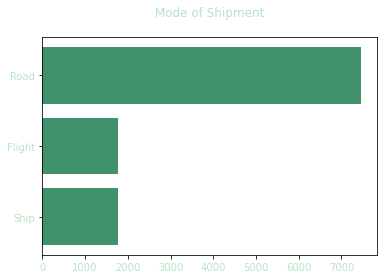

,freq,Percentage freq
Ship,7462,67.842531
Flight,1777,16.156014
Road,1760,16.001455


In [15]:
total = data['Mode_of_Shipment'].value_counts()
percentage = (total/len(data))*100
Mode_of_Shipment_freq = pd.concat([total,percentage] ,axis=1, keys=['freq','Percentage freq'])

plt.barh(data['Mode_of_Shipment'].value_counts().index , data['Mode_of_Shipment'].value_counts().sort_values() , color='#40916c')
plt.xticks(color="#b7e4c7")
plt.yticks(color="#b7e4c7")
plt.title("Mode of Shipment\n" , color='#b7e4c7')
plt.show();
Mode_of_Shipment_freq

C:\Users\pinkp\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


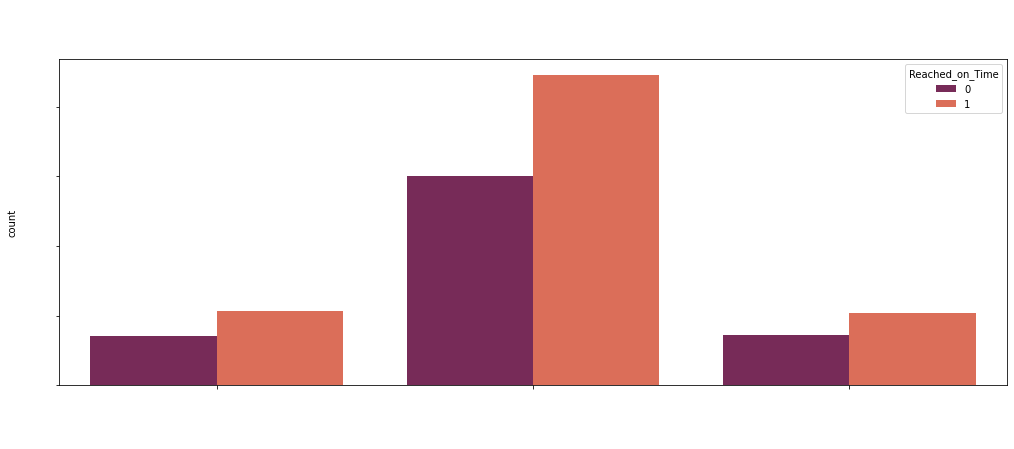

In [16]:
plt.figure(figsize = (17, 6))
sns.countplot('Mode_of_Shipment', hue = 'Reached_on_Time', data = data, palette='rocket')
plt.xlabel("\nShipping mode",fontsize=15,color='white')
plt.xticks(color='white',fontsize=12)
plt.yticks(color='white',fontsize=12)
plt.title('Reached on time according to the shipping mode\n',color='white',fontsize=25)
plt.show();

In [17]:
mode_shipment_cost = data.groupby(['Mode_of_Shipment'])['Cost_of_the_Product'].sum().sort_values(ascending=False).reset_index()
mode_shipment_cost

,Mode_of_Shipment,Cost_of_the_Product
0,Ship,1569580
1,Flight,371938
2,Road,370437


`--------------------------------Total cost for each shipment mode------------------------------------`

In [18]:
pd.pivot_table(data,index=['Mode_of_Shipment'] , values=['Cost_of_the_Product'] , aggfunc='sum').sort_values(by=['Cost_of_the_Product'],ascending=False)

,Cost_of_the_Product
Mode_of_Shipment,
Ship,1569580
Flight,371938
Road,370437


`-------------------------------------Customer care calls rate----------------------------------------`

In [19]:
print(data['Customer_care_calls'].max())
print(data['Customer_care_calls'].min())

7
2


In [20]:
pd.pivot_table(data,index=['Mode_of_Shipment'],values=['Customer_care_calls'],aggfunc='sum').sort_values(by=['Customer_care_calls'],ascending=False)

,Customer_care_calls
Mode_of_Shipment,
Ship,30151
Flight,7293
Road,7151


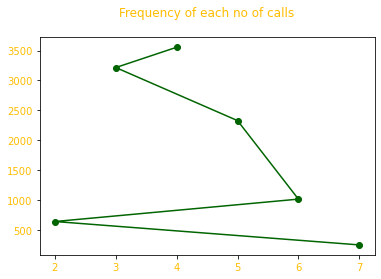

In [21]:
plt.plot(data['Customer_care_calls'].value_counts().index , data['Customer_care_calls'].value_counts()  ,'o-g', color='#006400')
plt.xticks(color='#ffbd00')
plt.yticks(color='#ffbd00')
plt.title("Frequency of each no of calls\n",color='#ffbd00');

C:\Users\pinkp\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


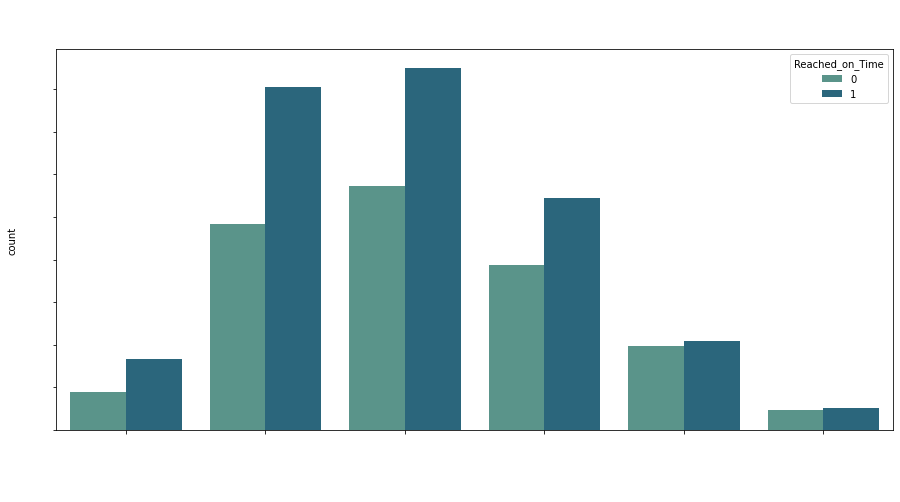

In [22]:
plt.figure(figsize=(15,7))
sns.countplot('Customer_care_calls',hue='Reached_on_Time',data=data,palette='crest')
plt.xticks(color='white',fontsize=15)
plt.yticks(color='white',fontsize=11)
plt.xlabel("\nCustomer care calls",fontsize=18,color='white')
plt.title("Customer care calls VS Reached on time\n",fontsize=20,color='white')
plt.show();

`----------------------------------------Customer_rating----------------------------------------------`

In [23]:
total = data.Customer_rating.value_counts().sort_values(ascending=False)
percentage = (total/len(data))*100
customer_rating_freq = pd.concat([total,percentage] ,axis=1, keys=['Total','Percentage freq'])
customer_rating_freq

,Total,Percentage freq
3,2239,20.356396
1,2235,20.320029
4,2189,19.901809
5,2171,19.738158
2,2165,19.683608


In [24]:
pd.pivot_table(data,index=['Customer_rating'],values=['Customer_care_calls'],aggfunc='sum').sort_values(by='Customer_rating' , ascending=False)

,Customer_care_calls
Customer_rating,
5,8881
4,8841
3,9086
2,8766
1,9021


C:\Users\pinkp\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


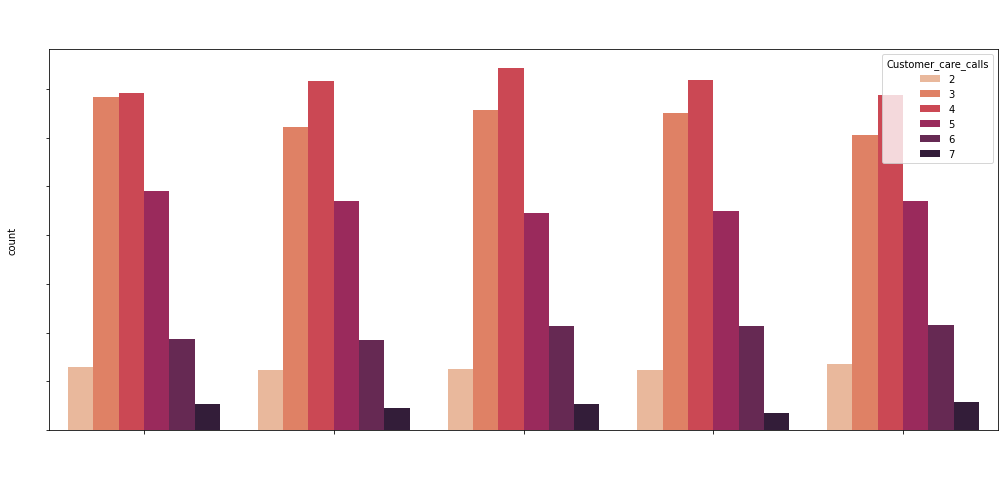

In [25]:
plt.figure(figsize=(17,7))
sns.countplot('Customer_rating',hue='Customer_care_calls',data=data,palette='rocket_r')
plt.xticks(color='white',fontsize=15)
plt.yticks(color='white',fontsize=11)
plt.xlabel("\nCustomer rating",fontsize=18,color='white')
plt.title("Customer rating according to no of calls\n",fontsize=20,color='white')
plt.show();

C:\Users\pinkp\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


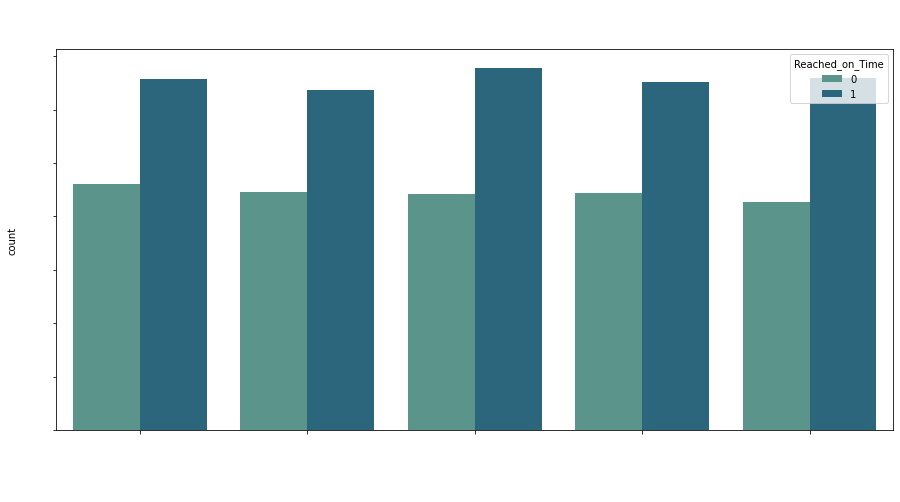

In [26]:
plt.figure(figsize=(15,7))
sns.countplot('Customer_rating',hue='Reached_on_Time',data=data,palette='crest')
plt.xticks(color='white',fontsize=15)
plt.yticks(color='white',fontsize=11)
plt.xlabel("\nCustomer rating",fontsize=18,color='white')
plt.title("Customer rating VS Reached on time\n",fontsize=20,color='white')
plt.show();

`------------------------------------------Cost of products-------------------------------------------`

In [27]:
data['Cost_of_the_Product'].describe()

count    10999.000000
mean       210.196836
std         48.063272
min         96.000000
25%        169.000000
50%        214.000000
75%        251.000000
max        310.000000
Name: Cost_of_the_Product, dtype: float64

C:\Users\pinkp\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


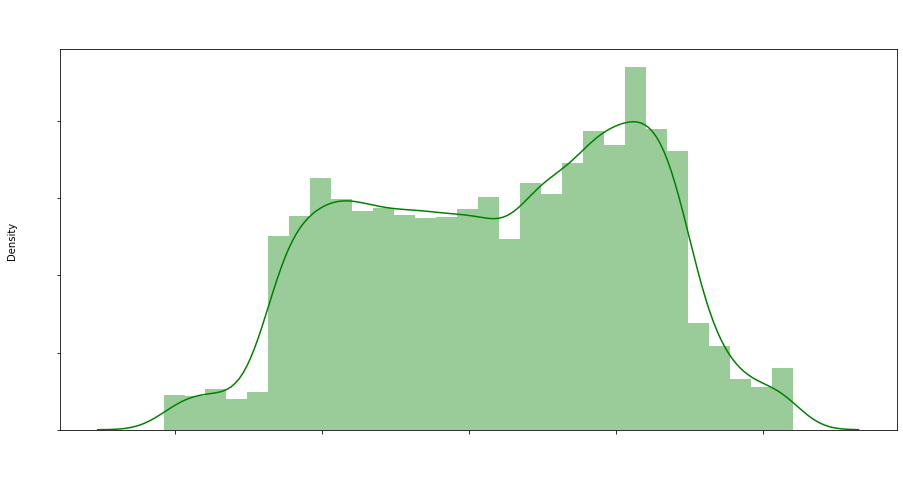

In [28]:

plt.figure(figsize = (15, 7))
sns.distplot(data['Cost_of_the_Product'], color = 'g')
plt.xticks(color='white',fontsize=15)
plt.yticks(color='white',fontsize=11)
plt.xlabel("\nCost_of_the_Product",fontsize=18,color='white')
plt.title("Cost of the Product distribution\n",fontsize=20,color='white')
plt.show();

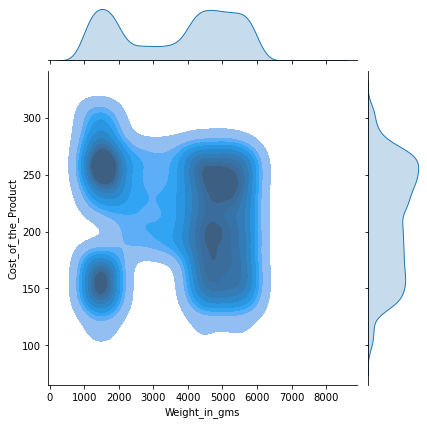

In [54]:
sns.jointplot(x='Weight_in_gms',y='Cost_of_the_Product',data=data,kind='kde',fill=True)

`-----------------------------------------Discount_offered--------------------------------------------`

C:\Users\pinkp\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


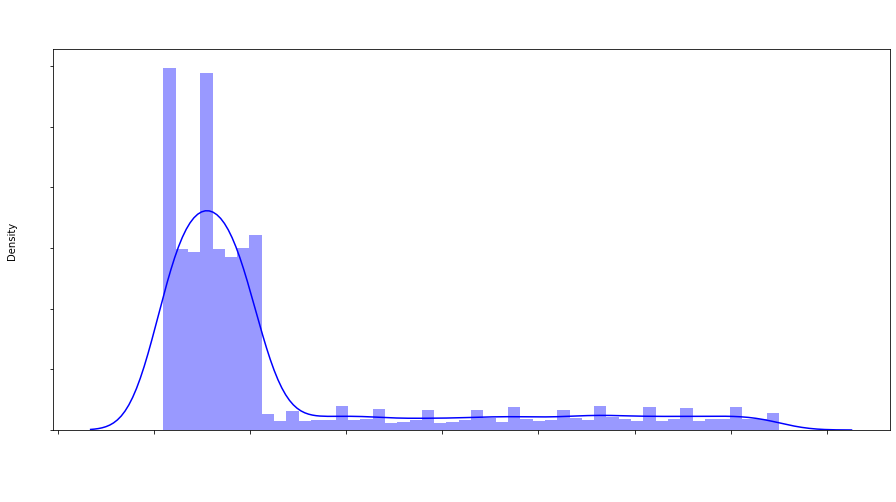

In [30]:
plt.figure(figsize=(15,7))
sns.distplot(data['Discount_offered'],color='b')
plt.xticks(color='white',fontsize=15)
plt.yticks(color='white',fontsize=11)
plt.xlabel("\nDiscount offered",fontsize=18,color='white')
plt.title("Discount offered distribution\n",fontsize=20,color='white')
plt.show();

In [31]:
data['Discount_offered'].describe()

count    10999.000000
mean        13.373216
std         16.205527
min          1.000000
25%          4.000000
50%          7.000000
75%         10.000000
max         65.000000
Name: Discount_offered, dtype: float64

In [32]:
data.groupby(['Product_importance'])['Discount_offered'].sum().sort_values(ascending=False).reset_index()

,Product_importance,Discount_offered
0,low,69089
1,medium,64099
2,high,13904


In [33]:
data.groupby(['Mode_of_Shipment'])['Discount_offered'].sum().sort_values(ascending=False).reset_index()

,Mode_of_Shipment,Discount_offered
0,Ship,100677
1,Flight,23387
2,Road,23028


In [34]:
data.groupby(['Customer_rating'])['Discount_offered'].sum().sort_values(ascending=False).reset_index()

,Customer_rating,Discount_offered
0,1,30079
1,2,29634
2,5,29297
3,3,29062
4,4,29020


In [35]:
data.groupby(['Warehouse_block'])['Discount_offered'].sum().sort_values(ascending=False).reset_index()

,Warehouse_block,Discount_offered
0,F,50107
1,C,24562
2,A,24237
3,B,24172
4,D,24014


`--------------------------------------------Weight in gms--------------------------------------------`

C:\Users\pinkp\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


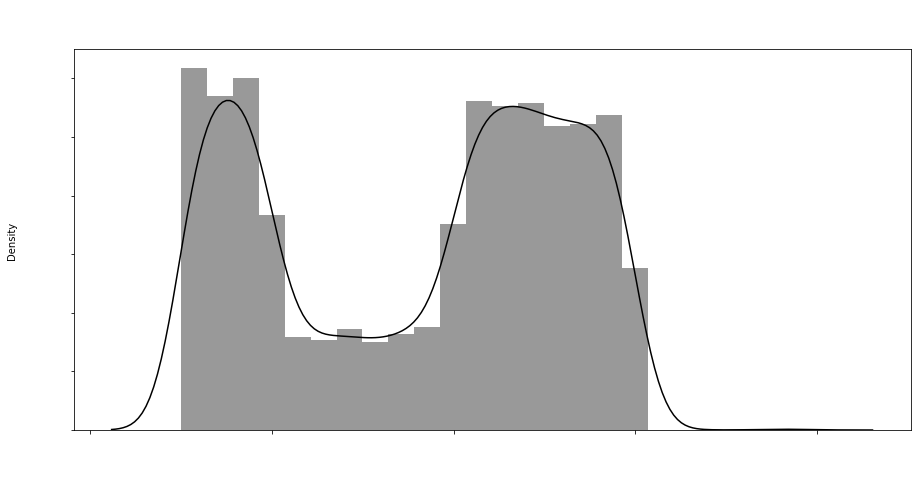

In [36]:
plt.figure(figsize=(15,7))
sns.distplot(data['Weight_in_gms'],color='k')
plt.xticks(color='white',fontsize=15)
plt.yticks(color='white',fontsize=11)
plt.xlabel("\nWeight in gms",fontsize=18,color='white')
plt.title("Weight distribution\n",fontsize=20,color='white')
plt.show();

In [37]:
data.groupby(['Mode_of_Shipment'])['Weight_in_gms'].mean().sort_values(ascending=False).reset_index()

,Mode_of_Shipment,Weight_in_gms
0,Road,3649.550568
1,Ship,3631.457518
2,Flight,3629.378165


In [38]:
data.groupby(['Warehouse_block'])['Weight_in_gms'].mean().sort_values(ascending=False).reset_index()

,Warehouse_block,Weight_in_gms
0,F,3641.387616
1,C,3641.331151
2,B,3635.701037
3,D,3628.846783
4,A,3615.448991


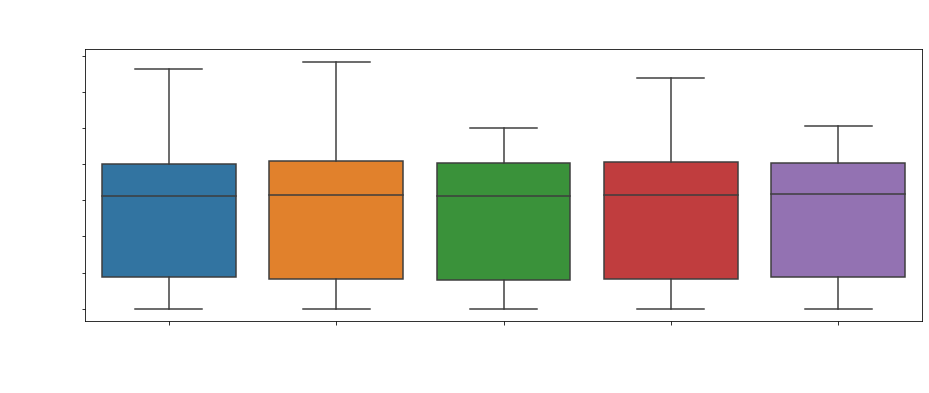

In [39]:
plt.figure(figsize=(15,5))
sns.boxplot(x='Warehouse_block',y='Weight_in_gms',data=data)
plt.xticks(color='white',fontsize=15)
plt.yticks(color='white',fontsize=11)
plt.xlabel("\nWarehouse blocks",fontsize=18,color='white')
plt.ylabel("\nWeight in gms",fontsize=18,color='white')
plt.title("Weight according to Warehouse  blocks\n",fontsize=20,color='white')
plt.show();

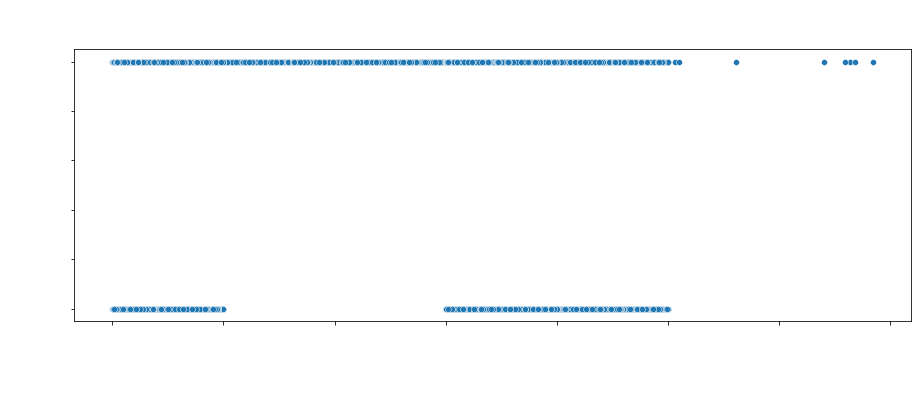

In [40]:
plt.figure(figsize=(15,5))
sns.scatterplot(x="Weight_in_gms",y="Reached_on_Time",data=data)
plt.xticks(color='white',fontsize=15)
plt.yticks(color='white',fontsize=11)
plt.xlabel("\nWeight in gms",fontsize=18,color='white')
plt.ylabel("\nReached on Time",fontsize=18,color='white')
plt.title("Relation between Weight & Reached on time\n",fontsize=20,color='white')
plt.show();

`---------------------------------------------Prior purchases-----------------------------------------`

C:\Users\pinkp\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


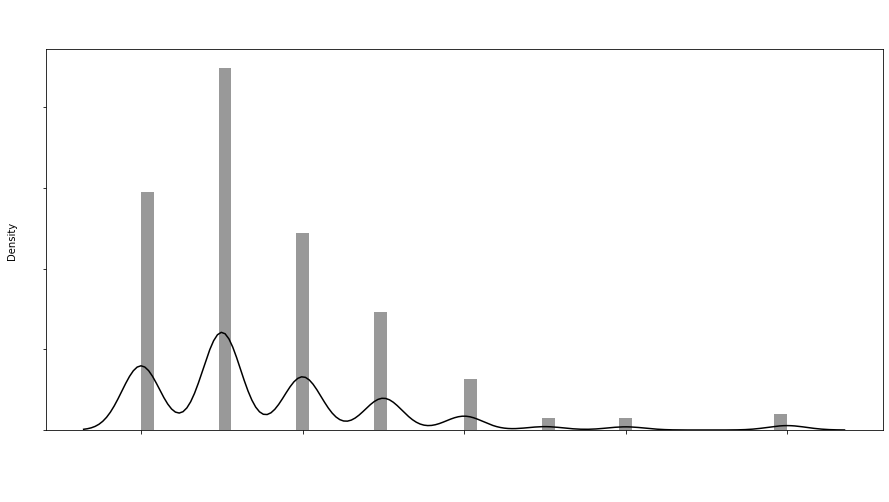

In [41]:
plt.figure(figsize=(15,7))
sns.distplot(data['Prior_purchases'],color='k')
plt.xticks(color='white',fontsize=15)
plt.yticks(color='white',fontsize=11)
plt.xlabel("\nno of Prior purchases",fontsize=18,color='white')
plt.title("Prior purchases distribution\n",fontsize=20,color='white')
plt.show();

In [42]:
data['ID'].duplicated().sum()

0

In [43]:
data.groupby(['Prior_purchases'])['Discount_offered'].mean().sort_values(ascending=False).reset_index()

,Prior_purchases,Discount_offered
0,7,17.529412
1,2,15.322816
2,3,14.981795
3,10,13.595506
4,8,13.320312
5,6,11.064171
6,4,10.845476
7,5,9.267288


`-------------------------------------------Product importance----------------------------------------`

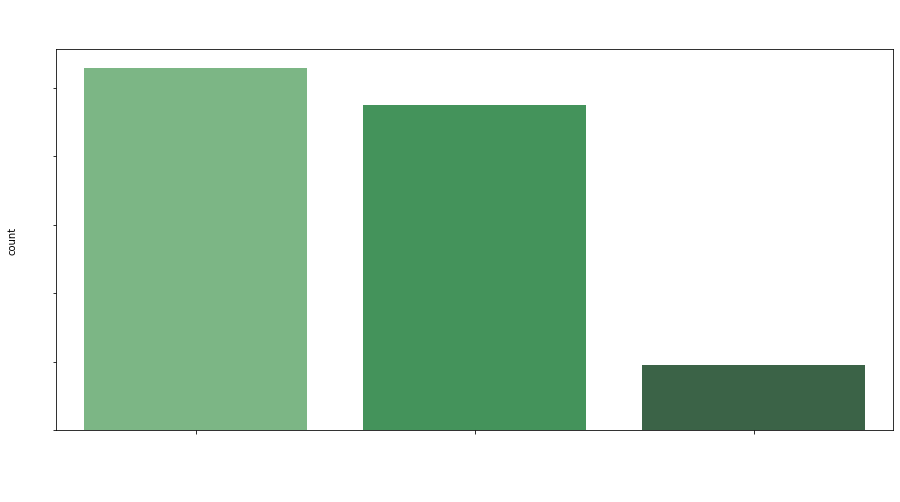

In [44]:
plt.figure(figsize=(15,7))
sns.countplot(x='Product_importance',data=data,palette='Greens_d')
plt.xticks(color='white',fontsize=15)
plt.yticks(color='white',fontsize=11)
plt.xlabel("\nProduct importance",fontsize=18,color='white')
plt.title("Product importance\n",fontsize=20,color='white')
plt.show();

C:\Users\pinkp\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


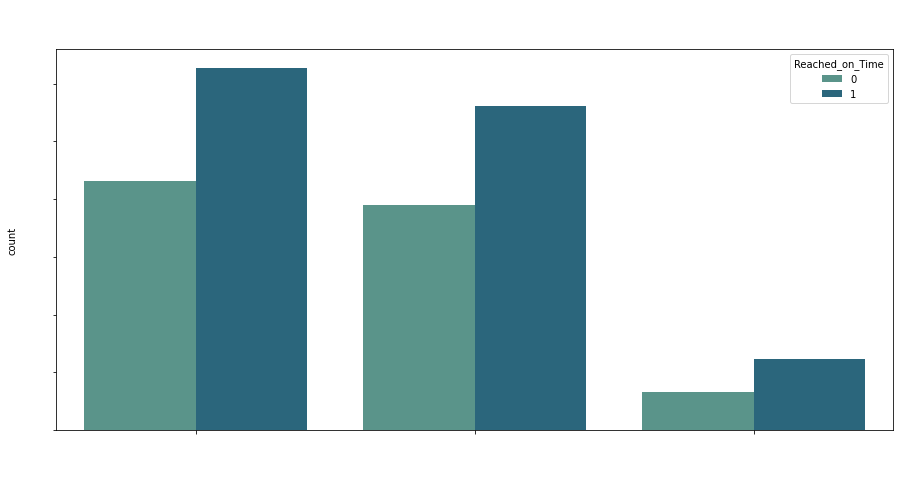

In [45]:
plt.figure(figsize=(15,7))
sns.countplot('Product_importance',hue='Reached_on_Time',data=data,palette='crest')
plt.xticks(color='white',fontsize=15)
plt.yticks(color='white',fontsize=11)
plt.xlabel("\nProduct importance",fontsize=18,color='white')
plt.title("Product importance VS Reached on time\n",fontsize=20,color='white')
plt.show();

In [46]:
data.groupby(['Product_importance'])['Customer_care_calls'].sum().sort_values(ascending=False).reset_index()

,Product_importance,Customer_care_calls
0,low,21772
1,medium,19152
2,high,3671


In [47]:
data.groupby(['Product_importance'])['Cost_of_the_Product','Discount_offered'].sum().sort_values(by='Cost_of_the_Product',ascending=False)

<ipython-input-47-e408cfbc94ff>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  data.groupby(['Product_importance'])['Cost_of_the_Product','Discount_offered'].sum().sort_values(by='Cost_of_the_Product',ascending=False)


,Cost_of_the_Product,Discount_offered
Product_importance,,
low,1123281,69089
medium,995404,64099
high,193270,13904
